In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [40]:
df = pd.read_csv('10_Property_stolen_and_recovered.csv')

In [41]:
df.shape

(2449, 8)

In [42]:
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937


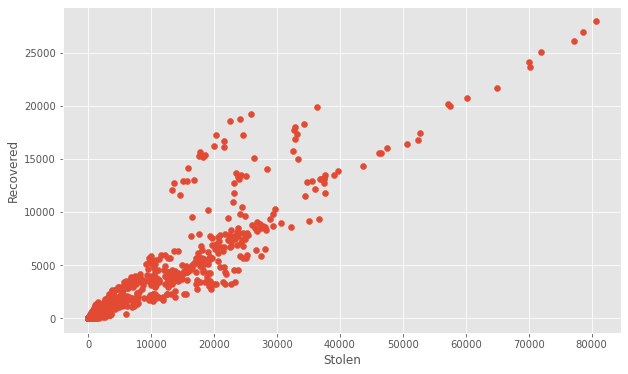

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(df['Cases_Property_Stolen'], df['Cases_Property_Recovered'])
plt.xlabel('Stolen')
plt.ylabel('Recovered')
plt.show()

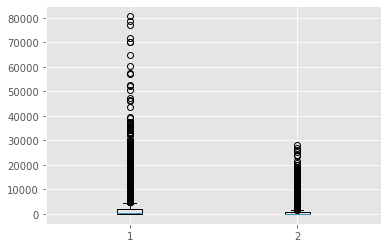

In [44]:
plt.boxplot([df['Cases_Property_Stolen'], df['Cases_Property_Recovered']])
plt.show()

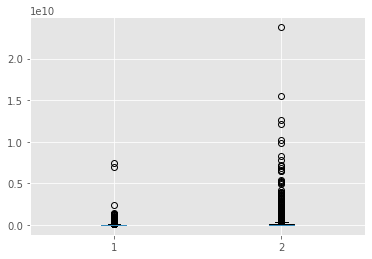

In [45]:
plt.boxplot([df['Value_of_Property_Recovered'], df['Value_of_Property_Stolen']])
plt.show()

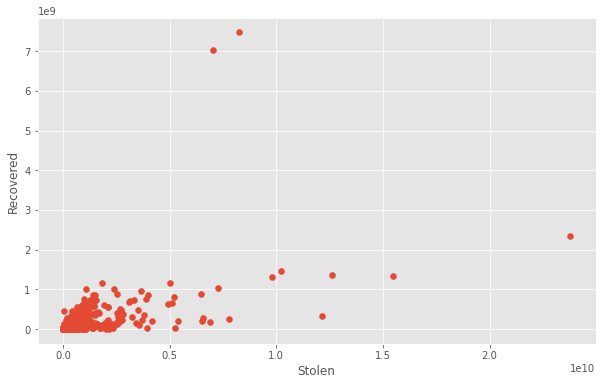

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(df['Value_of_Property_Stolen'], df['Value_of_Property_Recovered'])
plt.xlabel('Stolen')
plt.ylabel('Recovered')
plt.show()

In [47]:
# Trimming - Exclude the outliers
# Capping - cap our outliers data and put them inside limit

In [48]:
import numpy as np

In [49]:
df['Value_of_Property_Stolen'].median()

27018001.0

In [50]:
df['Value_of_Property_Stolen'].describe()

count    2.449000e+03
mean     2.465431e+08
std      9.670035e+08
min      0.000000e+00
25%      3.649018e+06
50%      2.701800e+07
75%      1.214580e+08
max      2.377625e+10
Name: Value_of_Property_Stolen, dtype: float64

In [25]:
Q1 = np.percentile(df['Value_of_Property_Stolen'], 25)
Q3 = np.percentile(df['Value_of_Property_Stolen'], 75)

In [26]:
Q1, Q3

(3649018.0, 121457955.0)

In [27]:
# Inter-Quartile Range
IQR = Q3 - Q1

In [28]:
IQR

117808937.0

In [29]:
upperLimit = Q3 + 1.5 * IQR
lowerLimit = Q1 - 1.5 * IQR

In [30]:
upperLimit, lowerLimit

(298171360.5, -173064387.5)

In [34]:
outliers = df[(df['Value_of_Property_Stolen'] > upperLimit) | (df['Value_of_Property_Stolen'] < lowerLimit)]

In [36]:
outliers.shape

(360, 8)

In [37]:
df['Value_of_Property_Stolen'] = np.where(df['Value_of_Property_Stolen'] > upperLimit, upperLimit, df['Value_of_Property_Stolen'])

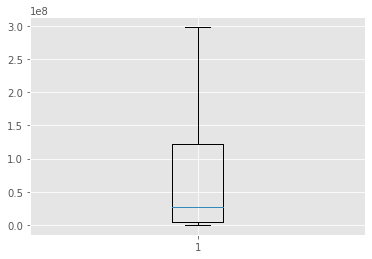

In [38]:
plt.boxplot(df['Value_of_Property_Stolen'])
plt.show()

In [39]:
df['Value_of_Property_Stolen'].describe()

count    2.449000e+03
mean     8.248351e+07
std      1.071059e+08
min      0.000000e+00
25%      3.649018e+06
50%      2.701800e+07
75%      1.214580e+08
max      2.981714e+08
Name: Value_of_Property_Stolen, dtype: float64